In [1]:
import sys
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
from shapely.geometry import Point
from shapely.geometry import MultiPoint
from shapely.geometry import MultiPolygon
from shapely.geometry import Polygon
from shapely.geometry import box
from descartes.patch import PolygonPatch
import ipywidgets as widgets
import ipywidgets.widgets.interaction
#from ipywidgets import interactive, fixed
from ipywidgets import *
import random
import pandas as pd

import re

from shapely import geometry
import pickle
import time

#from ipyparallel import Client

from shapely import affinity
from shapely.geometry import LineString
import warnings
warnings.simplefilter('ignore', np.RankWarning)


import gc
gc.enable()

In [2]:
#os.chdir('/home/charly/Lab/Projects/uJ/local/experiments/HT-AMP/')

# import sys, importlib
# # importlib.reload(sys.modules['DataManagers'])
# importlib.reload(sys.modules['TrackingFunctions'])
# #importlib.reload(sys.modules['PlottingFunctions'])
# # from DataManagers import *
# from TrackingFunctions import *
# #from PlottingFunctions import *

In [3]:
pwd

'/home/esb/Projects/uJ/local/experiments/HT-AMP'

In [4]:
#sys.path.insert(0, '/Users/ESB/SYNC_RPM/RPM_Work/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/esb/Projects/uJ/uJ_master/current/uJ_src/python/')
#sys.path.insert(0, '/home/charly/Lab/Projects/uJ/uJ_master/current/uJ_src/python/')
sys.path.insert(0, '/home/esb/Projects/uJ/local/current/uJ_src_pHT/python/')
sys.path.insert(0, '/home/charly/Lab/Projects/uJ/local/current/uJ_src_pHT/python/')

#from readroi import *
from DataManagers import *
from DataStructs import *
from AnalysisFunctions import *
from TrackingFunctions import *
from PlottingFunctions import *


Importing readroi
DataStructs...loaded!
DataManagers...loaded!
> Analysis Functions loaded
TrackingFunctions... loaded!
PlottingFunctions... loaded!


## Experiment Parameters

In [8]:


expeLabel="HT-AMP"
rootDir="../../data_sample/HT-AMP/"
trap_list="xy01,xy02,xy03,xy04,xy05,xy06,xy07,xy11,xy12,xy13,xy14,xy15,xy16,xy21".split(",")  
trap_list="xy15,xy15-1".split(",")  



#data_type="relativeIntensity"
#data_type="normData"
data_type="normData"


figxlim=640
figylim=512

flims=(figxlim,figylim)

#Input files

for trap in trap_list:
    #Input files
    dirNameROIs=rootDir+"data_rois/"+trap+"/GFP/"
    #dirNameDATA=rootDir+'data/'+data_type+'/'+trap+"/"
    dirNameDATA=rootDir+'data/'+data_type+'/'+trap+"/"
    
    #Output
    dirNameCELLS=rootDir+'data_cells/'+trap+'/'+data_type+'/'
   

    dirNameTRACKEDCELLS=rootDir+'data_cells_tracked/'+trap+'/'+data_type+'/'
    


    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    if not os.path.exists(dirNameTRACKEDCELLS_IMGS):
        print("making dir figures...")
        os.makedirs(dirNameTRACKEDCELLS_IMGS)
   
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    if not os.path.exists(dirNameDATALINEAGES):
        print("making dir lineages...")
        os.makedirs(dirNameDATALINEAGES)

#toFile=False
toFile=True
    

frame2min=5

notcaptured_start=866
notcaptured_end=866


frame_experiment_start=55;
frame_signal_start=91
frame_signal_end=91
frame_experiment_end=127

t_experiment_start=0
t_signal_start=(frame_signal_start-frame_experiment_start)*frame2min  
t_signal_end=(frame_signal_end-frame_experiment_start)*frame2min
t_experiment_end=(frame_experiment_end-frame_experiment_start)*frame2min


frames=range(int(frame_experiment_start),int(frame_experiment_end+1))

times=[(this_frame-frame_experiment_start)*frame2min for this_frame in frames]
times_hour=[(this_frame-frame_experiment_start)*frame2min/60 for this_frame in frames]
#print("\nMinutes:  %s"%times)
#print("\nHours:  [%s,%s]"%(times_hour[0],times_hour[-1]))


print("\nFrames:  %s\t %s->%s hours"%(frames,times_hour[0],times_hour[-1]))
print("t_experiment_start=%s\t(%sh)"%(t_experiment_start, t_experiment_start/60))
print("t_experiment_end=%s\t(%sh)"%(t_experiment_end, t_experiment_end/60))



#print(dataPath)
#if not os.path.exists(figurePathDM) and toFile:
#    os.mkdir(figurePathDM)




Frames:  range(55, 128)	 0.0->6.0 hours
t_experiment_start=0	(0.0h)
t_experiment_end=360	(6.0h)


### Load tracked cells

In [6]:

max_frames=-1

trap_tracked_cells=[]
for trap in trap_list:
    print(trap)
    dirNameTRACKEDCELLS=rootDir+'data_cells_tracked/'+trap+"/"+data_type+"/"
    
    tracked_cells=load_cells(dirNameTRACKEDCELLS,max_frames)
    print(len(tracked_cells))
    trap_tracked_cells.append(tracked_cells)

xy15
72: Loading HT-AMP_xy15_127.pkl
73
xy15-1
72: Loading HT-AMP_xy15_127.pkl
73


# Make the lineages

In [9]:
trap_lineages=[]
for i,trap in enumerate(trap_list):
    #if i==0: continue
    
    print(i,trap)
    tracked_cells=trap_tracked_cells[i]
    this_lineages=make_cellLineages_all(tracked_cells,frame_experiment_start)
    trap_lineages.append(this_lineages)
    print(len(this_lineages))
    

0 xy15
Making lineages of 245 cells out of 245 from frame 72 
Making lineages of 54 cells out of 263 from frame 71 56 	 *18 - 1771 	 22 	 65 	 1616 	 44 	 70	 18 	 4871 	 62 66
Making lineages of 68 cells out of 270 from frame 70 
Making lineages of 73 cells out of 284 from frame 69 
Making lineages of 57 cells out of 277 from frame 68 1 	 58
Making lineages of 59 cells out of 286 from frame 67 
Making lineages of 75 cells out of 305 from frame 66 
Making lineages of 54 cells out of 305 from frame 65 
Making lineages of 58 cells out of 308 from frame 64 
Making lineages of 62 cells out of 313 from frame 63 
Making lineages of 82 cells out of 324 from frame 62 
Making lineages of 63 cells out of 326 from frame 61 
Making lineages of 65 cells out of 325 from frame 60 
Making lineages of 76 cells out of 329 from frame 59 
Making lineages of 68 cells out of 330 from frame 58 
Making lineages of 77 cells out of 345 from frame 57 
Making lineages of 74 cells out of 350 from frame 56 
Making 

IndexError: list index out of range

### Export time-series

In [11]:
trap_list=trap_list[0:1]
trap_list

['xy15']

In [12]:
max_frames=frame_experiment_end-frame_experiment_start
minFrames=max_frames-16
#minFrames=40

for i,trap in enumerate(trap_list):
    print(trap)
    this_lineages=trap_lineages[i]
    dirNameDATALINEAGES=rootDir+'data/lineages/'#+trap+"/"
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_all.csv"
    save_data_lineages(this_lineages,filename)
    print(len(this_lineages),"saved!")
    analysis_lineages=get_analysis_lineages(this_lineages, frame_signal_start,frame_signal_end,"lineageID")
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_analysis.csv"
    save_data_lineages(analysis_lineages,filename)
    print(len(analysis_lineages),"saved!")
    long_lineages=get_long_lineages(this_lineages,"lineageID" ,minFrames)
    filename=dirNameDATALINEAGES+expeLabel+"_"+trap+"_lineages_long.csv"
    save_data_lineages(long_lineages,filename)
    print(len(long_lineages),"saved!")

xy15
Saving file ../../data_sample/HT-AMP/data/lineages/HT-AMP_xy15_lineages_all.csv


5754 saved!


Saving file ../../data_sample/HT-AMP/data/lineages/HT-AMP_xy15_lineages_analysis.csv
4071 saved!  %
Saving file ../../data_sample/HT-AMP/data/lineages/HT-AMP_xy15_lineages_long.csv
46 saved!  %


../../data_sample/HT-AMP/figures/traked_cells/xy15/


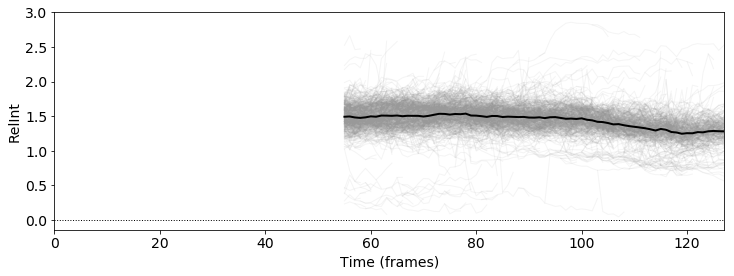

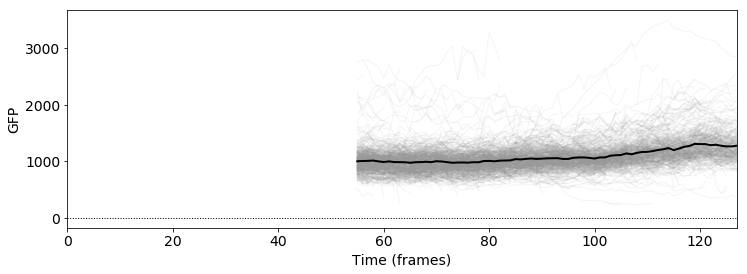

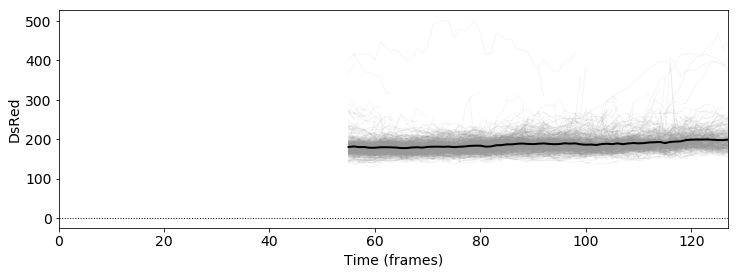

In [14]:
for i,trap in enumerate(trap_list):
    
    this_lineages=trap_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    mpl.rcParams.update({'font.size': 14})
    data_labels={'GFP','DsRed','RelInt'}
    for this_data_label in data_labels:
        fileName="%s%s_%s_timeseries_%s.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap,this_data_label)
        plot_cells_data(this_lineages, this_data_label, fileName)
        plt.show()







../../data_sample/HT-AMP/figures/traked_cells/xy15/


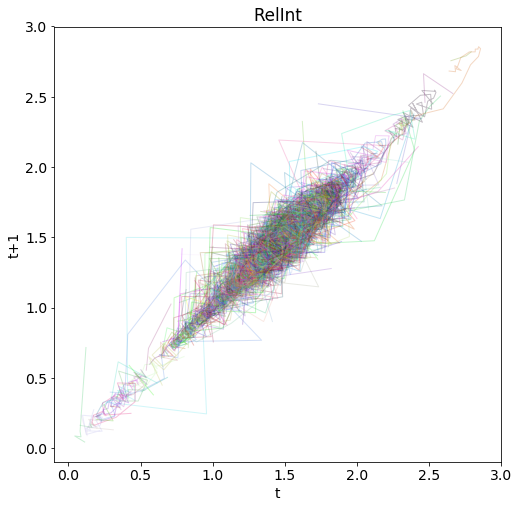

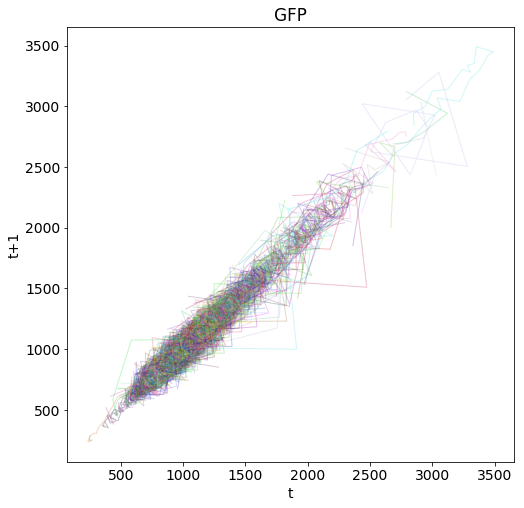

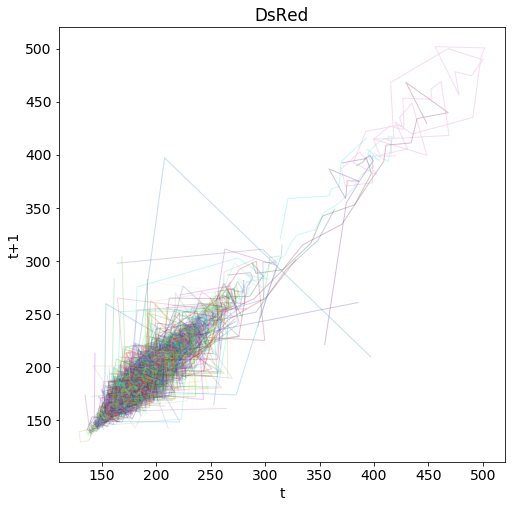

In [15]:
   

    
mpl.rcParams.update({'font.size': 14})
data_labels={'RelInt'} #'GFP','DsRed',
data_labels={'GFP','DsRed','RelInt'}
for i,trap in enumerate(trap_list):
    #print(trap)
    this_lineages=trap_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    #data_labels={'GFP','DsRed'}
    for this_data_label in data_labels:
        fileName="%s%s_%s_poincare_%s.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap,this_data_label)
        plot_cells_poincare(this_lineages, this_data_label, fileName)
        plt.show()    

### Export Horizon Plots

In [18]:

minFrames=60


num_levels=4




for i,trap in enumerate(trap_list):
    #print(trap)
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    
    this_lineages=trap_lineages[i]
    
    long_lineages=get_long_lineages(this_lineages,"lineageID" ,minFrames)
    #long_lineages=get_analysis_lineages(this_lineages, frame_signal_start,frame_experiment_end,frame_experiment_start)
    #long_lineages=this_lineages
    print(len(long_lineages))
    fileName="%s%s_%s_horizons.png"%(dirNameTRACKEDCELLS_IMGS,expeLabel,trap)
    print(fileName)
    plot_relativeIntensity_Horizon(long_lineages, num_levels, fileName)
    plt.close()

../../data_sample/HT-AMP/figures/traked_cells/xy15/
39
../../data_sample/HT-AMP/figures/traked_cells/xy15/HT-AMP_xy15_horizons.png


## Load Data & Plot layer

In [19]:
def load_data_lineages(fileName):
    #df_lineages = pd.read_csv(fileName,dtype=object)
    df_lineages = pd.read_csv(fileName)
    print('Loading %s lineages from %s'%(len(df_lineages.lineageID.unique()), fileName))
    return df_lineages


In [20]:
trap_df_lineages=[]
trap_df_lineages_long=[]
for i,trap in enumerate(trap_list):
    #cell_lineages=trap_lineages[i]
    dirNameDATALINEAGES=rootDir+'data/lineages/'
    
    lineagesDataFile='%s%s_%s_lineages_all.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages=load_data_lineages(lineagesDataFile)
    trap_df_lineages.append(df_lineages)
    list_frames=df_lineages.frame.unique()
    lineagesDataFile='%s%s_%s_lineages_analysis.csv'%(dirNameDATALINEAGES, expeLabel, trap)
    df_lineages_long=load_data_lineages(lineagesDataFile)
    trap_df_lineages_long.append(df_lineages_long)

Loading 498 lineages from ../../data_sample/HT-AMP/data/lineages/HT-AMP_xy15_lineages_all.csv
Loading 58 lineages from ../../data_sample/HT-AMP/data/lineages/HT-AMP_xy15_lineages_analysis.csv


### Draw ROIs + Data Overlay (export to PNG)  

233.896 3491.469
129.035 501.86800000000005
34902


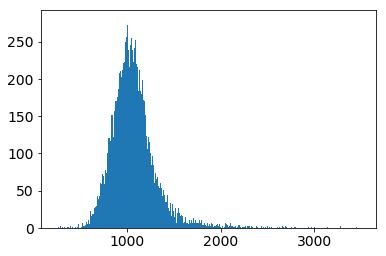

34902


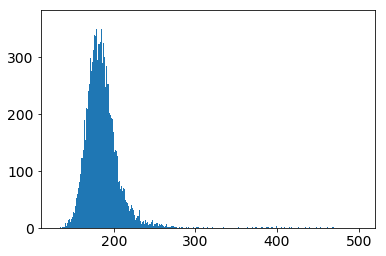

In [21]:
all_df_lineages=pd.concat(trap_df_lineages)
maxg=all_df_lineages["GFP"].max()
ming=all_df_lineages["GFP"].min()
maxr=all_df_lineages["DsRed"].max()
minr=all_df_lineages["DsRed"].min()
print(ming,maxg)
print(minr,maxr)
gb=np.linspace(float(ming),float(maxg),1000)
#gs=[float(x) for x in all_df_lineages["GFP"]]
gs=list(all_df_lineages["GFP"])
print(len(gs))
plt.hist(gs,bins=gb)

plt.show()
rb=np.linspace(float(minr),float(maxr),1000)
rs=list(all_df_lineages["DsRed"])
print(len(rs))
plt.hist(rs,bins=rb)

plt.show()



In [22]:
layer1 = {'channel':'GFP',  'minvalue':100, 'maxvalue':2000, 'contour':True}
layer2 = {'channel':'DsRed','minvalue':100,'maxvalue':250,'contour':True}
layer3 = {'channel':'Mask','minvalue':100,'maxvalue':500,'contour':True}
layer4 = {'channel':'RelInt','minvalue':-.15,'maxvalue':np.pi+.15,'contour':True}
layer5 = {'channel':'Tracking','minvalue':0,'maxvalue':0,'contour':True}
layer6 = {'channel':'division','minvalue':0,'maxvalue':1,'contour':True}
layers=[layer1, layer2, layer3, layer4, layer5, layer6]
#layers=[layer4]

for i,trap in enumerate(trap_list[0:1]):
    cell_lineages=trap_lineages[i]
    df_lineages=trap_df_lineages[i]
    dirNameTRACKEDCELLS_IMGS=rootDir+'figures/traked_cells/'+trap+'/'
    print(dirNameTRACKEDCELLS_IMGS)
    #print(df_lineages.head())
    for layer in layers:
        print("Exporting layer %s"%(layer['channel']))
        dirNameIMAGEOVERLAY=dirNameTRACKEDCELLS_IMGS+layer['channel']+'/'
        if not os.path.exists(dirNameIMAGEOVERLAY):
            os.makedirs(dirNameIMAGEOVERLAY)

        for this_frame in list_frames:
            print(this_frame,end="\r")
            [trackIDs, trackPolys, trackData]=get_data_roi(cell_lineages, df_lineages, this_frame,layer['channel'])
            #print(trackIDs, "\n\t",trackData)
           
            fileNameIMAGEOVERLAY="%s/%s_%s_%s.png"%(dirNameIMAGEOVERLAY,expeLabel,trap,str(this_frame).zfill(3))

            draw_channel(this_frame, layer, trackIDs, trackPolys, trackData, fileNameIMAGEOVERLAY,flims)
            
        print()

../../data_sample/HT-AMP/figures/traked_cells/xy15/
Exporting layer GFP
127
Exporting layer DsRed
127
Exporting layer Mask
127
Exporting layer RelInt
127
Exporting layer Tracking
127
Exporting layer division
127


In [ ]:
list_frames2=list_frames[-3:]
list_frames2